# Analysis for the next film in SussexBudgetProductions

Our company SussexBudgetProduction incurred a huge loss in its last produced film. We can't compete with other producers if the next film fails at the box office. So, we are here now to analyze the past IMDB data of the movies given, and we are going to come up with the best suggestions to make our next movie that will be a blockbuster at the box office.

For the analysis, we are using the film budget, IMDB score, genre, gross and the director’s name from the data provided and we perform exploratory data analysis between these variables to check how they influence each other. With these analysed data, a testable hypothesis is formed and subjected to testing. Based on the hypothesis results, we will come up with appropriate final suggestions.


In [1]:
#standard imports for when working with pandas
import numpy as np
#matplotlib inline
from matplotlib import pyplot as plt
from scipy import stats
import pandas as pd

movie_data = 'movie_metadata.csv'

#read the movie metadata file into a dataframe in pandas.
df = pd.read_csv(movie_data,index_col=None)
#with df.head we can see an overview of the datas in the movie_metadata file.
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


We need the profit made by the movie to see whether the movie makes a good return or not. Profit is usually calculated by subtracting the returns we made, from the amount we spent i.e., Profit=Gross-Budget. So, I added a column named ‘profit’ to the data frame.

In [2]:
# Adds the profit column to the dataframe after calculating it
df['profit']=df.gross-df.budget
df.head(2)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0


### Data Cleaning

To get a clear-cut insight from the given dataset, it must be cleaned. Data cleaning is a way where we take actions to remove a duplicate value/row, dropping the blank and null values that might give anomalies in the appropriate results. In the below code, we are performing the data cleaning.

In [3]:
# Removes the duplicate rows in the dataset and stores it in a new dataframe
new_df=df.drop_duplicates()

# Removes the rows with null values to avoid ambigous results
new_df=new_df.dropna()

#dispalys the overview of new dataframe with profit columns and without null/duplicate values
display(new_df.head())

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0


In the above overview, we can see there are negative values in the last column(‘profit’) of the data frame. The negative values say that movie faced a loss in box office collection. For the next film to be good we need to show the investors at least 2 times returns from the budget. With a budget of 1.5 million, the movie needs to make at least 3 million as a profit.

### Functions used

We are using a few functions here to avoid code repetition.


In the below function, based on the ‘colname’ we are taking out the values in the data frame with at least three occurrences (not duplicate). Because the suggestion may not have a good hold if we are interpreting with just one or two entries. E.g.: If we are taking input as ‘director_name’ for ‘colname’, then the object returned by the function has the director names who had made at least three movies.

In [4]:
# Writing a function that returns a object with only the colname given
def count_of_given_cols(colname):
    #Selects the colname given and the movie_title and groups it by colname
    colname_movies=df.loc[:,[colname,'movie_title']].groupby(colname)

    #setting a new dataframe indexed by the variable colname which stores colname and counts of colnames
    colname_movie_counts=colname_movies.count().reset_index(colname)

    #changing column name to reduce confusion
    colname_movie_counts.columns = [colname,'number of movies']
    
    #Sorting in descending order for easy interpretation
    colname_movie_counts = colname_movie_counts.sort_values('number of movies', ascending=False)
    
    #filtering out the rows where the colname given has more than two occurences 
    colname_movie_counts = colname_movie_counts[colname_movie_counts['number of movies']>=3]
    
    #put into object that contains only the colname
    colname_no_movies = colname_movie_counts[:][colname]
    return colname_no_movies

This function below does further filtering because we have a budget limit of 1.5 million and ensured a return of 3 million. So, we have to look into the dataset in search of directors and genres that can make movies within the given constraints.

In [5]:
#Returns a dataframe containing the top profited values based on col_name with the constraints budget limit and profit ensured 
def datas_wth_hgh_prft(col_name,maximum_budget=1500000,profit_ensured=3000000):
    #Uses the function count_of_given_cols() to get the object with more occurences
    col_name_with_more_movies=count_of_given_cols(col_name)
    
    #taking out the values in the new_df which has more than three occurences
    top_rated_col_name=new_df[new_df[col_name].isin(col_name_with_more_movies)]
    
    #filtering out dataframe with budget limit
    top_col_name_in_budgt = top_rated_col_name[top_rated_col_name['budget']<maximum_budget]
    
    #filtering the dataframe with profit ensured
    top_profited_colnm_in_budgt=top_col_name_in_budgt[top_col_name_in_budgt['profit']>=profit_ensured]
    
    #Grouping the dataframe based on given colname and calculating their mean of profit and budget
    tp_prft_col_nm_mn=top_profited_colnm_in_budgt.groupby(col_name)[['profit','budget']].mean()
    
    #sorting in descending order based on profit
    tp_prft_col_nm_mn = tp_prft_col_nm_mn.sort_values('profit', ascending=False)
    
    return tp_prft_col_nm_mn

The below function plots a bar graph with a given data frame.

In [34]:
#plots a bargraph
def plot_df(df_name,xlabel='names/genre',ylabel='Profit'):
    #plots the graph
    ax=df_name.plot(kind='bar',figsize=(5,5),fontsize=10)
    
    #draws grid lines
    ax.yaxis.grid(True)
    
    #Sets x axis label
    ax.set_xlabel(xlabel)
    ax.set_xticklabels(df_name.index,rotation=0)
    #Sets y axis label
    ax.set_ylabel(ylabel)
    
    #Sets graph title
    title_gra="BarGraph on Profit of the movies based on "+ xlabel
#     ax.set_title(title_gra)

The function below returns the corresponding p-value by taking the sample population.

In [7]:
# Returns p value based on the given sample population(variable_fr_grp) and groups based on the given col_name value
def p_value_calc(col_name,variable_fr_grp):
    #groups by col_name and finds the mean profit of corresponding movies
    col_name_means=new_df.groupby(col_name)['profit'].mean()
    
    #groups by col_name and finds standard deviation of profit on corresponding movies
    col_name_std=new_df.groupby(col_name)['profit'].std()
    
    #groups by col_name and finds the counts of movies that made profit 
    col_name_count=new_df.groupby(col_name)['profit'].count()
    
    #calculating the z value with which the p-value is obtained
    P_G = (col_name_means[variable_fr_grp]-new_df['profit'].mean())/(col_name_std[variable_fr_grp]/np.sqrt(col_name_count[variable_fr_grp]))
    
    #if the sample size is less than 30 we use t-test
    if col_name_count[variable_fr_grp]<30:
        p_value_from_t=(1-stats.t.cdf(P_G,col_name_count[variable_fr_grp]))
        print("Performing t-test")
        return p_value_from_t
    
    #if the sample size is large enough we use z-test
    else:
        p_value_from_normal=(1-stats.norm.cdf(P_G))
        print("Performing z-test")
        return p_value_from_normal

Now we have the required functions and cleaned data frames to perform the exploratory data analysis with the IMDB data.

### Exploratory Data Analysis

#### Analysis based on Director Name

A movie’s success may depend greatly on how well the director portrayed the story and the genres which the audience likes the most.
Now, I am going to look up the directors in the dataset, who gives more average profit, with an average budget less than the given budget.


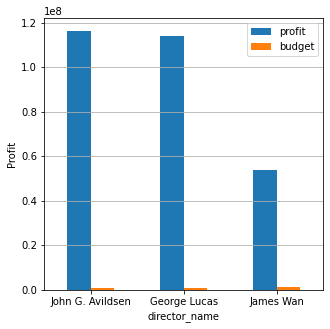

In [35]:
# Using the function datas_wth_hgh_prft() and getting the directors who makes more profit within budget limit
direcor_with_high_profit=datas_wth_hgh_prft('director_name')

sdfg=direcor_with_high_profit.head(3)

# Having a look on the directors name who makes more profit
# display(sdfg)

# plotting the directors name with the average profit and budget to have better visualisation
plot_df(sdfg,xlabel='director_name')

From the above graph and table, we can see that directors John G. Avildsen and George Lucas are among the topmost profiting directors who can make films within our budget.

Now we will investigate further details of the movies made by these directors.

In [9]:
# fliters out and gives the rows with director name as 'George Lucas' from the original cleaned dataframe new_df
dir_spec=new_df[new_df['director_name']=='George Lucas']

# displays only the columns that are required for interpretation
display(dir_spec.loc[:,['director_name','genres','budget','gross','profit','imdb_score','country']])

,director_name,genres,budget,gross,profit,imdb_score,country
236,George Lucas,Action|Adventure|Fantasy|Sci-Fi,113000000.0,380262555.0,267262555.0,7.6,USA
237,George Lucas,Action|Adventure|Fantasy|Sci-Fi,115000000.0,310675583.0,195675583.0,6.7,USA
240,George Lucas,Action|Adventure|Fantasy|Sci-Fi,115000000.0,474544677.0,359544677.0,6.5,USA
3024,George Lucas,Action|Adventure|Fantasy|Sci-Fi,11000000.0,460935665.0,449935665.0,8.7,USA
4674,George Lucas,Comedy|Drama|Music,777000.0,115000000.0,114223000.0,7.5,USA


With the above table, we can see that George Lucas has made five movies in the cleaned IMDB movie dataset.

In [10]:
# fliters out and gives the rows with director name as 'John G. Avildsen' from the original cleaned dataframe new_df
dir_spec=new_df[new_df['director_name']=='John G. Avildsen']

# Shows only the required columns for interpretation
display(dir_spec.loc[:,['director_name','genres','budget','gross','profit','imdb_score','country']])

,director_name,genres,budget,gross,profit,imdb_score,country
1184,John G. Avildsen,Action|Drama|Family|Sport,8000000.0,90800000.0,82800000.0,7.2,USA
3351,John G. Avildsen,Action|Drama|Family|Sport,8000000.0,90800000.0,82800000.0,7.2,USA
4530,John G. Avildsen,Drama|Sport,960000.0,117235247.0,116275247.0,8.1,USA


From this table, we can say that John G. Avildsen has made only three movies from the same IMDB movie dataset.

With this interpretation based on directors, we can say that George Lucas is much more reliable in making suggestions than John G. Avildsen.

#### Analysis based on Genres

Now we will investigate the profit made by movies based on the genres.

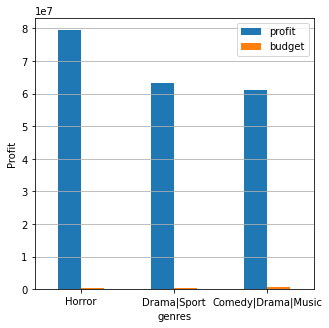

In [36]:
# Getting the genres that gives high profit using the function datas_wth_hgh_prft()
genres_with_high_profit=datas_wth_hgh_prft('genres')
fgh=genres_with_high_profit.head(3)
#look up for the top profited genres
# display(fgh)

# ploting bargraph based on profit made by genres using function plot_df()
plot_df(fgh,xlabel='genres')

From the above table and graph within the given budget limit, we can say that the movies made in the genres Horror, Drama|Sport and Comedy|Drama|Music are more certain to give high profit.

Looking further in detail into the respective genres.

In [12]:
# taking the row that has the value of 'Horror' in coloumn genre
genre_spec=new_df[new_df['genres']=='Horror']

# Taking an overlook on the required columns in Horror genre for interpretaion 
display(genre_spec.loc[:,['director_name','genres','budget','profit','gross','imdb_score','country']].head(6))

,director_name,genres,budget,profit,gross,imdb_score,country
1223,David R. Ellis,Horror,40000000.0,26466372.0,66466372.0,5.2,USA
1261,Steven Quale,Horror,40000000.0,2575718.0,42575718.0,5.9,USA
1420,Wes Craven,Horror,1800000.0,24705000.0,26505000.0,7.5,USA
1451,Jaume Collet-Serra,Horror,30000000.0,2048809.0,32048809.0,5.3,Australia
1547,Rupert Wainwright,Horror,29000000.0,21041732.0,50041732.0,6.2,USA
1652,David Slade,Horror,32000000.0,7568996.0,39568996.0,6.6,USA


In [13]:
# taking the row that has the value of 'Comedy|Drama|Music' in coloumn genre
genre_spec=new_df[new_df['genres']=='Comedy|Drama|Music']

# Taking an overlook on the required columns in Comedy|Drama|Music genre for interpretaion 
display(genre_spec.loc[:,['director_name','genres','budget','profit','gross','imdb_score','country']].head(6))

,director_name,genres,budget,profit,gross,imdb_score,country
1757,Ang Lee,Comedy|Drama|Music,30000000.0,-22556993.0,7443007.0,6.7,USA
2576,Bruce Paltrow,Comedy|Drama|Music,15000000.0,-10265765.0,4734235.0,6.0,USA
2756,Gregory Jacobs,Comedy|Drama|Music,14800000.0,51209973.0,66009973.0,5.7,USA
3135,Robert Altman,Comedy|Drama|Music,10000000.0,10338609.0,20338609.0,6.8,USA
3198,Spike Lee,Comedy|Drama|Music,10000000.0,-7814734.0,2185266.0,6.5,USA
3984,Peter Cattaneo,Comedy|Drama|Music,3500000.0,42357453.0,45857453.0,7.2,UK


In [14]:
# taking the row that has the value of 'Comedy|Drama|Music' which is a top profited genre
genre_spec=new_df[new_df['genres']=='Comedy|Drama|Music']
# looking that George lucas has made movies in top genre
genre_spec=genre_spec[genre_spec['director_name']=='George Lucas']

# Taking an overlook on the required columns in Comedy|Drama|Music genre made by George Lucas for interpretaion 
display(genre_spec.loc[:,['director_name','genres','budget','profit','gross','imdb_score','country']].head(6))

,director_name,genres,budget,profit,gross,imdb_score,country
4674,George Lucas,Comedy|Drama|Music,777000.0,114223000.0,115000000.0,7.5,USA


George Lucas has also made a movie in the highly profiting genre.

Also, we can see that with this above tables there are more movies made in the 'Horror' and 'Comedy|Drama|Music' genre, In this we are going to take the genre 'Horror' to make our hypotheses.

### Hypothesis testing

With the given data we can see that George Lucas is one of the best profitable directors and the Horror genre most probably gives more profit within our given budget limit.
Now, we must check whether George Lucas’s movies and Horror genre movies are profitable.

Let's say we are interested in knowing if profit made by George Lucas movies are significantly more than 3 million 

##### Hypothesis on Director 'George Lucas'

The testable hypothesis would be that if George Lucas makes a movie, then the profit is more likely to be greater than 3 million.

Null Hypothesis H_0: Movies made by the director George Lucas doesn't have any significance in the profit of a movie. ( H_0: µ=3M).

Alternate Hypothesis H_1: Movies made by the director George Lucas has a significant impact on the movie's profit. (H_1:µ>3M).

In [15]:
#performs one- tailed t-test by calling the function p_value_calc()
p_value_george=p_value_calc('director_name','George Lucas')
print("One tail p value from t based on Director George Lucas",p_value_george)

Performing t-test
One tail p value from t based on Director George Lucas 0.0029615018360067413


We can see that the p-value is statistically significant with a value of less than 0.05, which gives strong evidence to reject the null hypothesis and accept the alternate hypothesis.

##### Hypothesis on Genre 'Horror'

The testable hypothesis would be that if a movie is in the Horror genre, then the profit is more likely to be greater than 3 million.

Null Hypothesis H_0: Movies made in the genre Horror doesn't have any significance in the profit of a movie ( H_0: µ=3M).
    
Alternate Hypothesis H_1: Movies made in the genre Horror has a significant impact on the movie's profit (H_1: µ>3M).


In [16]:
#performs one- tailed z-test by calling the function p_value_calc()
p_value_Horror_genre= p_value_calc('genres','Horror')
print("One tail p value from normal based on Horror genre",p_value_Horror_genre)

Performing z-test
One tail p value from normal based on Horror genre 0.0004215018094024803


The p-value we got from the test is 0.0004 which is less than 0.05, it shows statistical significance in rejecting the null hypothesis and accepting the alternate hypothesis.

From the above we can say that director George Lucas's movie and a movie in the genre of Horror has good evidence that they can ensure a good amount of profit.

### Summary

I have taken the IMDB data given, which after being cleaned by removing null and duplicate values, exploratory data analysis was performed where we plotted the bar graphs with the given data, based on which we saw an overview of the directors and movie genres that gave more profit.

Then I chose a few directors such as George Lucas, John G. Avildsen and in the genres of Horror, Comedy|Drama|Music and looked at whether it had enough samples for testing. And then I picked George Lucas in directors and Horror in genres for hypothesis testing. In the hypothesis testing, I performed the t-test for the hypothesis on director George Lucas where it had a sample count(n) of less than 30 and performed the z-test for the hypothesis on the Horror genre as it had a large sample(n>30), where both the tests yielded a p-value less than 0.05, that resulted in the rejection of null hypothesis in both. i.e., the data strongly supports that director George Lucas and the Horror genre movies are highly profitable.

With the above findings, my suggestions with a budget of 1.5 million are to make our next movie with George Lucas as the director or a movie in horror genre or George Lucas can make a movie in Comedy|Drama|Music genre and releasing it in the USA will get a good return.
